In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [3]:
count=0
dirs= os.listdir("Images/")
for dir in dirs:
    files= list(os.listdir("Images/"+dir))
    print(dir + " Folder has " + str(len(files)) + " Images")
    count=count+ len(files)
print("Images Folde has " + str(count) + " Images")


daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Images Folde has 4317 Images


In [4]:
base_dir ="Images/"
img_size =180
batch=32

In [5]:
train_ds= tf.keras.utils.image_dataset_from_directory(base_dir, 
                                                       seed=123, 
                                                       validation_split=0.2, 
                                                       subset="training", 
                                                       batch_size=batch, 
                                                       image_size=(img_size,img_size))
val_ds = tf.keras.utils.image_dataset_from_directory(base_dir, 
                                                       seed=123, 
                                                       validation_split=0.2, 
                                                       subset="validation", 
                                                       batch_size=batch, 
                                                       image_size=(img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [6]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [7]:
import matplotlib.pyplot as plt

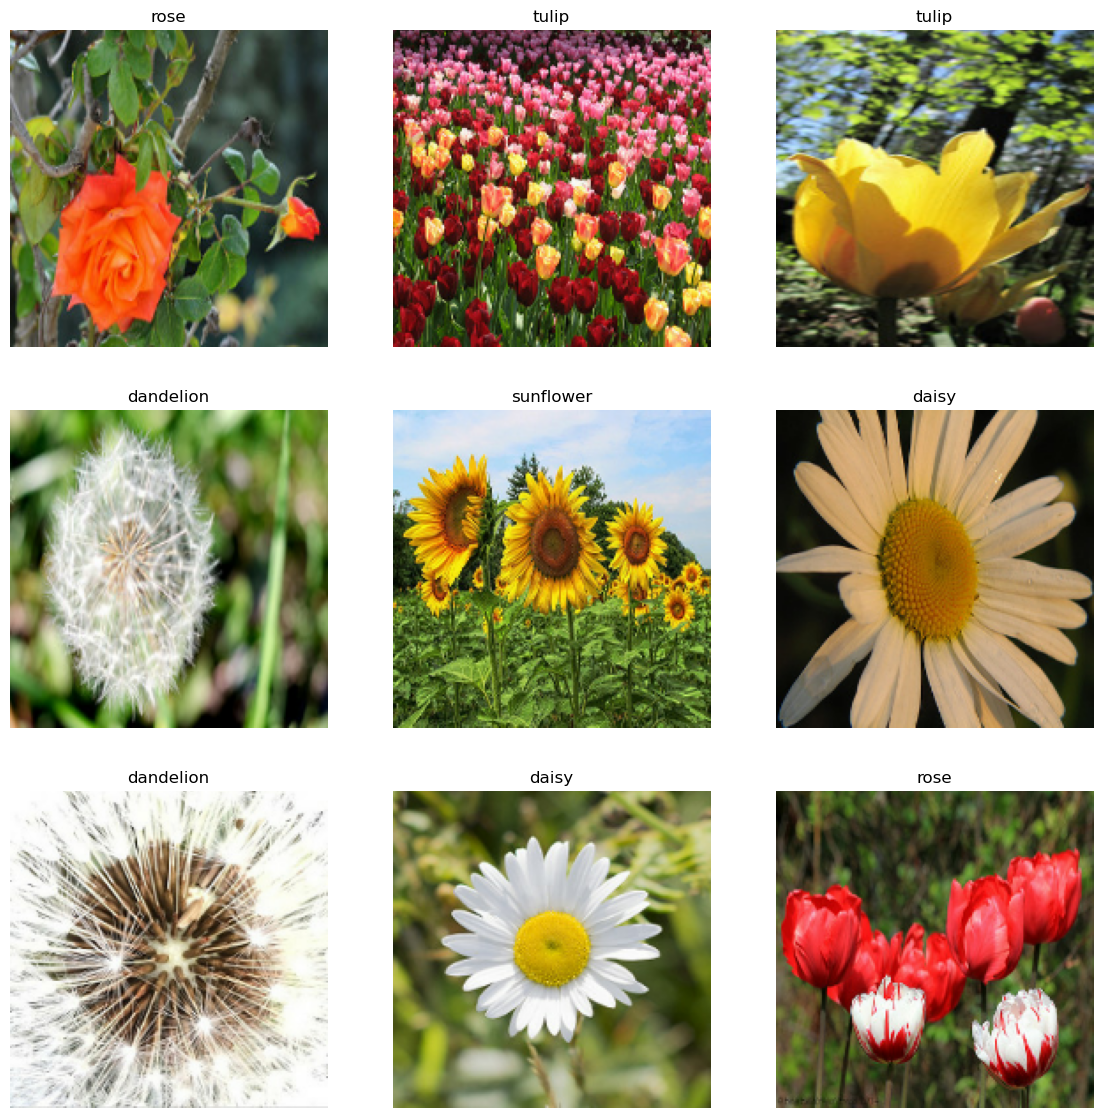

In [8]:
plt.figure(figsize=(14,14))
i=0
for images, labels in train_ds.take(1):
    for i in range (9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(flower_names[labels[i]])
        plt.axis("off")
    
    

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [11]:
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size, img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

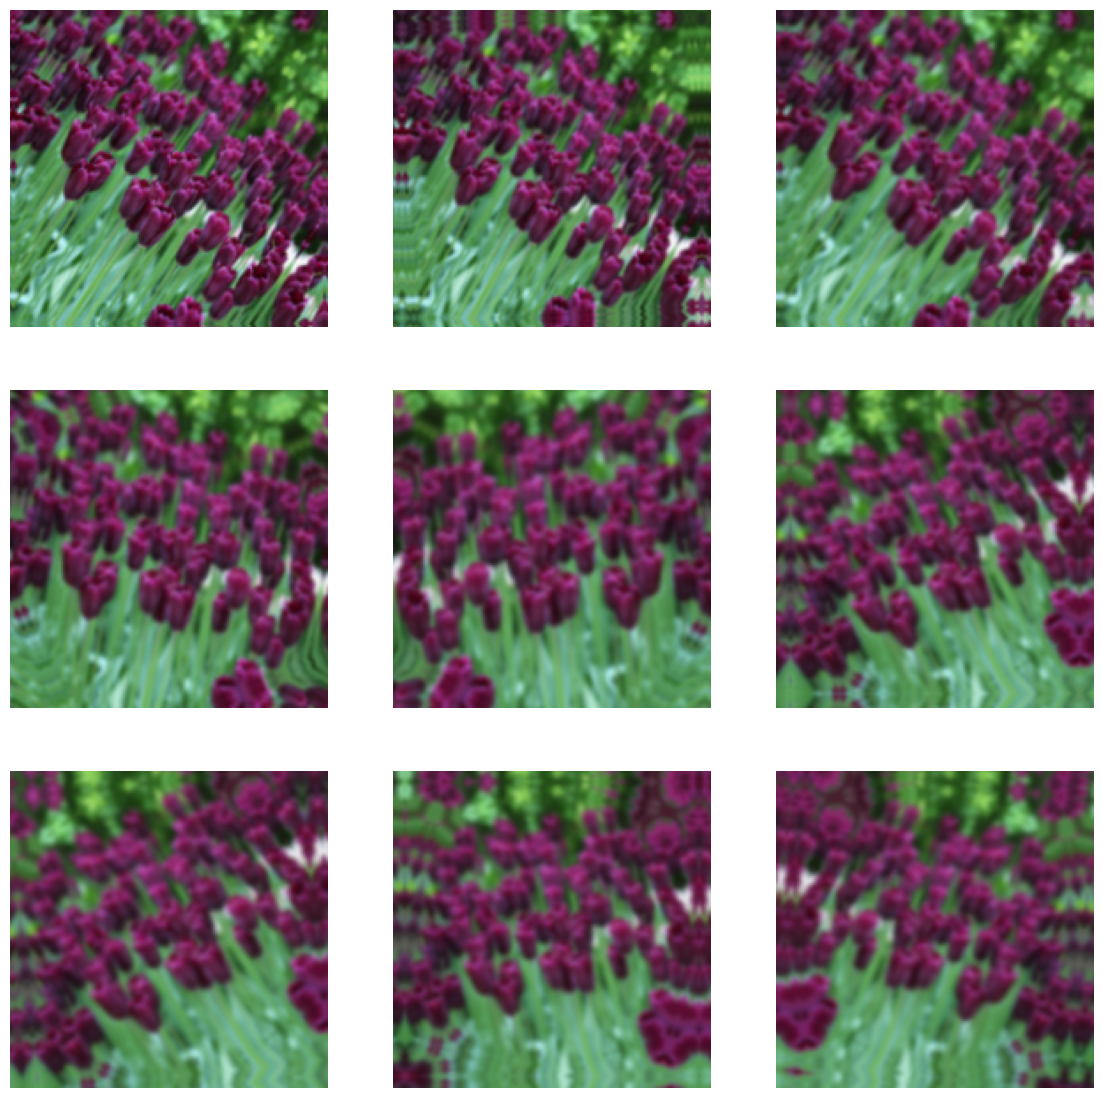

In [13]:
plt.figure(figsize=(14,14))
i=0
for images, labels in train_ds.take(1):
    for i in range (9):
        images= data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype("uint8"))
        plt.axis("off")

In [14]:
model= Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(32, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(64, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(5)])

In [15]:
model.compile(optimizer="adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [17]:
history=model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15


108/108 [==============================] - 33s 290ms/step - loss: 1.4242 - accuracy: 0.3636 - val_loss: 1.2299 - val_accuracy: 0.4855
Epoch 2/15
108/108 [==============================] - 28s 262ms/step - loss: 1.1161 - accuracy: 0.5631 - val_loss: 1.0155 - val_accuracy: 0.5979
Epoch 3/15
108/108 [==============================] - 28s 263ms/step - loss: 1.0086 - accuracy: 0.6036 - val_loss: 0.9529 - val_accuracy: 0.6396
Epoch 4/15
108/108 [==============================] - 28s 260ms/step - loss: 0.9153 - accuracy: 0.6433 - val_loss: 0.9108 - val_accuracy: 0.6512
Epoch 5/15
108/108 [==============================] - 28s 262ms/step - loss: 0.8660 - accuracy: 0.6601 - val_loss: 0.9029 - val_accuracy: 0.6419
Epoch 6/15
108/108 [==============================] - 28s 261ms/step - loss: 0.8551 - accuracy: 0.6685 - val_loss: 0.8680 - val_accuracy: 0.6744
Epoch 7/15
108/108 [==============================] - 28s 263ms/step - loss: 0.7910 - accuracy: 0.6960 - val_loss: 0.8110 - val_

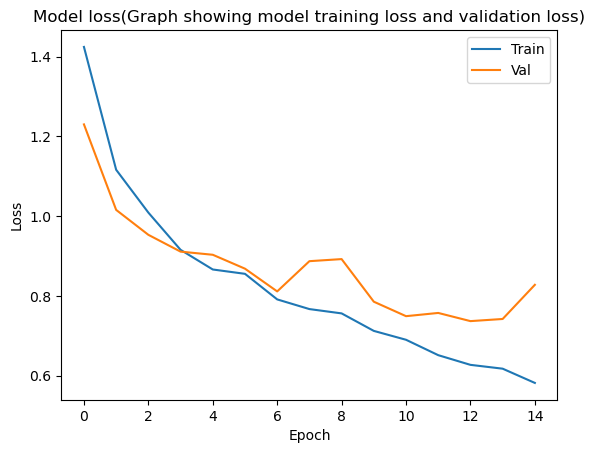

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss(Graph showing model training loss and validation loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

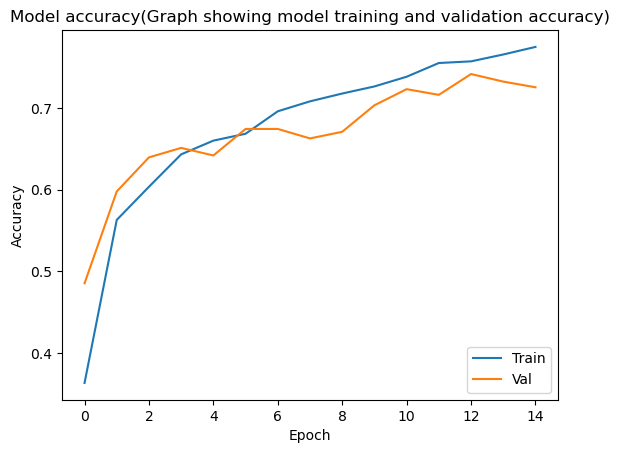

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy(Graph showing model training and validation accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [39]:
input_image=tf.keras.utils.load_img("Sample/rose_not.jpg", target_size=(180,180))
input_image_array=tf.keras.utils.img_to_array(input_image)
input_image_exp_dim = tf.expand_dims(input_image_array,0)

predictions= model.predict(input_image_exp_dim)
result=tf.nn.softmax(predictions[0])
flower_names[np.argmax(result)]


1/1 [==============================] - 0s 25ms/step


'sunflower'

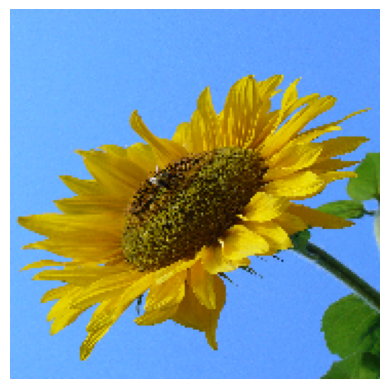

In [40]:
plt.imshow(input_image)
plt.axis('off')
plt.show()

In [41]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = "The Image belongs to " + flower_names[np.argmax(result)] + " with a score of " + str(np.max(result) * 100)
    return outcome


In [42]:
classify_images("Sample/sunflower.jpg")

1/1 [==============================] - 0s 29ms/step


'The Image belongs to sunflower with a score of 99.68045949935913'

In [43]:
model.save("Flower_Recognition_Model.h5")